## House Prices - Advanced Regression Techniques

## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler

## Import the data

In [69]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [70]:
print('Dimension train_df:', train_df.shape)
print('Dimension test_df:', test_df.shape)

Dimension train_df: (1460, 81)
Dimension test_df: (1459, 80)


In [8]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
test_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Checking the datatypes and Null-values

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

There are missing data in "LotFrontage", "Alley", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Electrical", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence" and "MiscFeature". We will replace null by median value or mode value.

Null values of object data type will be replaced with their mode values, and null values of int64 or float64 will be replaced with ther median values. 

In [11]:
fill_methods = {
    'LotFrontage': 'median',
    'MasVnrType': 'mode',
    'MasVnrArea': 'median',
    'BsmtQual': 'mode',
    'BsmtCond': 'mode',
    'BsmtExposure': 'mode',
    'BsmtFinType1': 'mode',
    'BsmtFinType2': 'mode',
    'Electrical': 'mode',
    'GarageType': 'mode',
    'GarageYrBlt': 'median',
    'GarageFinish': 'mode',
    'GarageQual': 'mode',
    'GarageCond': 'mode'
}

for col, method in fill_methods.items():
    if method == 'median':
        train_df[col].fillna(train_df[col].median(), inplace=True)
    elif method == 'mode':
        train_df[col].fillna(train_df[col].value_counts().index[0], inplace=True)

Replacing null values with median or mode values for the test data set. 

In [12]:
test_fill_methods = {
    'MSZoning': 'mode',
    'LotFrontage': 'median',
    'Utilities': 'mode',
    'Exterior1st': 'mode',
    'Exterior2nd': 'mode',
    'MasVnrType': 'mode',
    'MasVnrArea': 'median',
    'BsmtQual': 'mode',
    'BsmtCond': 'mode',
    'BsmtExposure': 'mode',
    'BsmtFinType1': 'mode',
    'BsmtFinSF1': 'median',
    'BsmtFinType2': 'mode',
    'BsmtFinSF2': 'median',
    'BsmtUnfSF': 'median',
    'TotalBsmtSF': 'median',
    'BsmtFullBath': 'median',
    'BsmtHalfBath': 'median',
    'KitchenQual': 'mode',
    'Functional': 'mode',
    'GarageType': 'mode',
    'GarageYrBlt': 'median',
    'GarageFinish': 'mode',
    'GarageCars': 'median',
    'GarageArea': 'median',
    'GarageQual': 'mode',
    'GarageCond': 'mode',
    'SaleType': 'mode'
}

for col, method in test_fill_methods.items():
    if method == 'median':
        test_df[col].fillna(test_df[col].median(), inplace=True)
    elif method == 'mode':
        test_df[col].fillna(test_df[col].value_counts().index[0], inplace=True)

In [13]:
train_df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)
test_df.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [14]:
# Transforming numerical variables that are categorical into strings for the train data set. 

train_df['MSSubClass'] = train_df['MSSubClass'].apply(str)
train_df['OverallCond'] = train_df['OverallCond'].astype(str)
train_df['YrSold'] = train_df['YrSold'].astype(str)
train_df['MoSold'] = train_df['MoSold'].astype(str)

# Transforming some numerical variables that are categorical into strings for the test data set. 

test_df['MSSubClass'] = test_df['MSSubClass'].apply(str)
test_df['OverallCond'] = test_df['OverallCond'].astype(str)
test_df['YrSold'] = test_df['YrSold'].astype(str)
test_df['MoSold'] = test_df['MoSold'].astype(str)

In [15]:
train_df.shape

(1460, 76)

In [16]:
test_df.shape

(1459, 75)

In [17]:
# Adding another column "SalePrice_per_squarefeet" to the train data set. This gives us the Sale price per square feet.

train_df['SalePrice_per_squareFeet'] = train_df['SalePrice'] / train_df['LotArea']

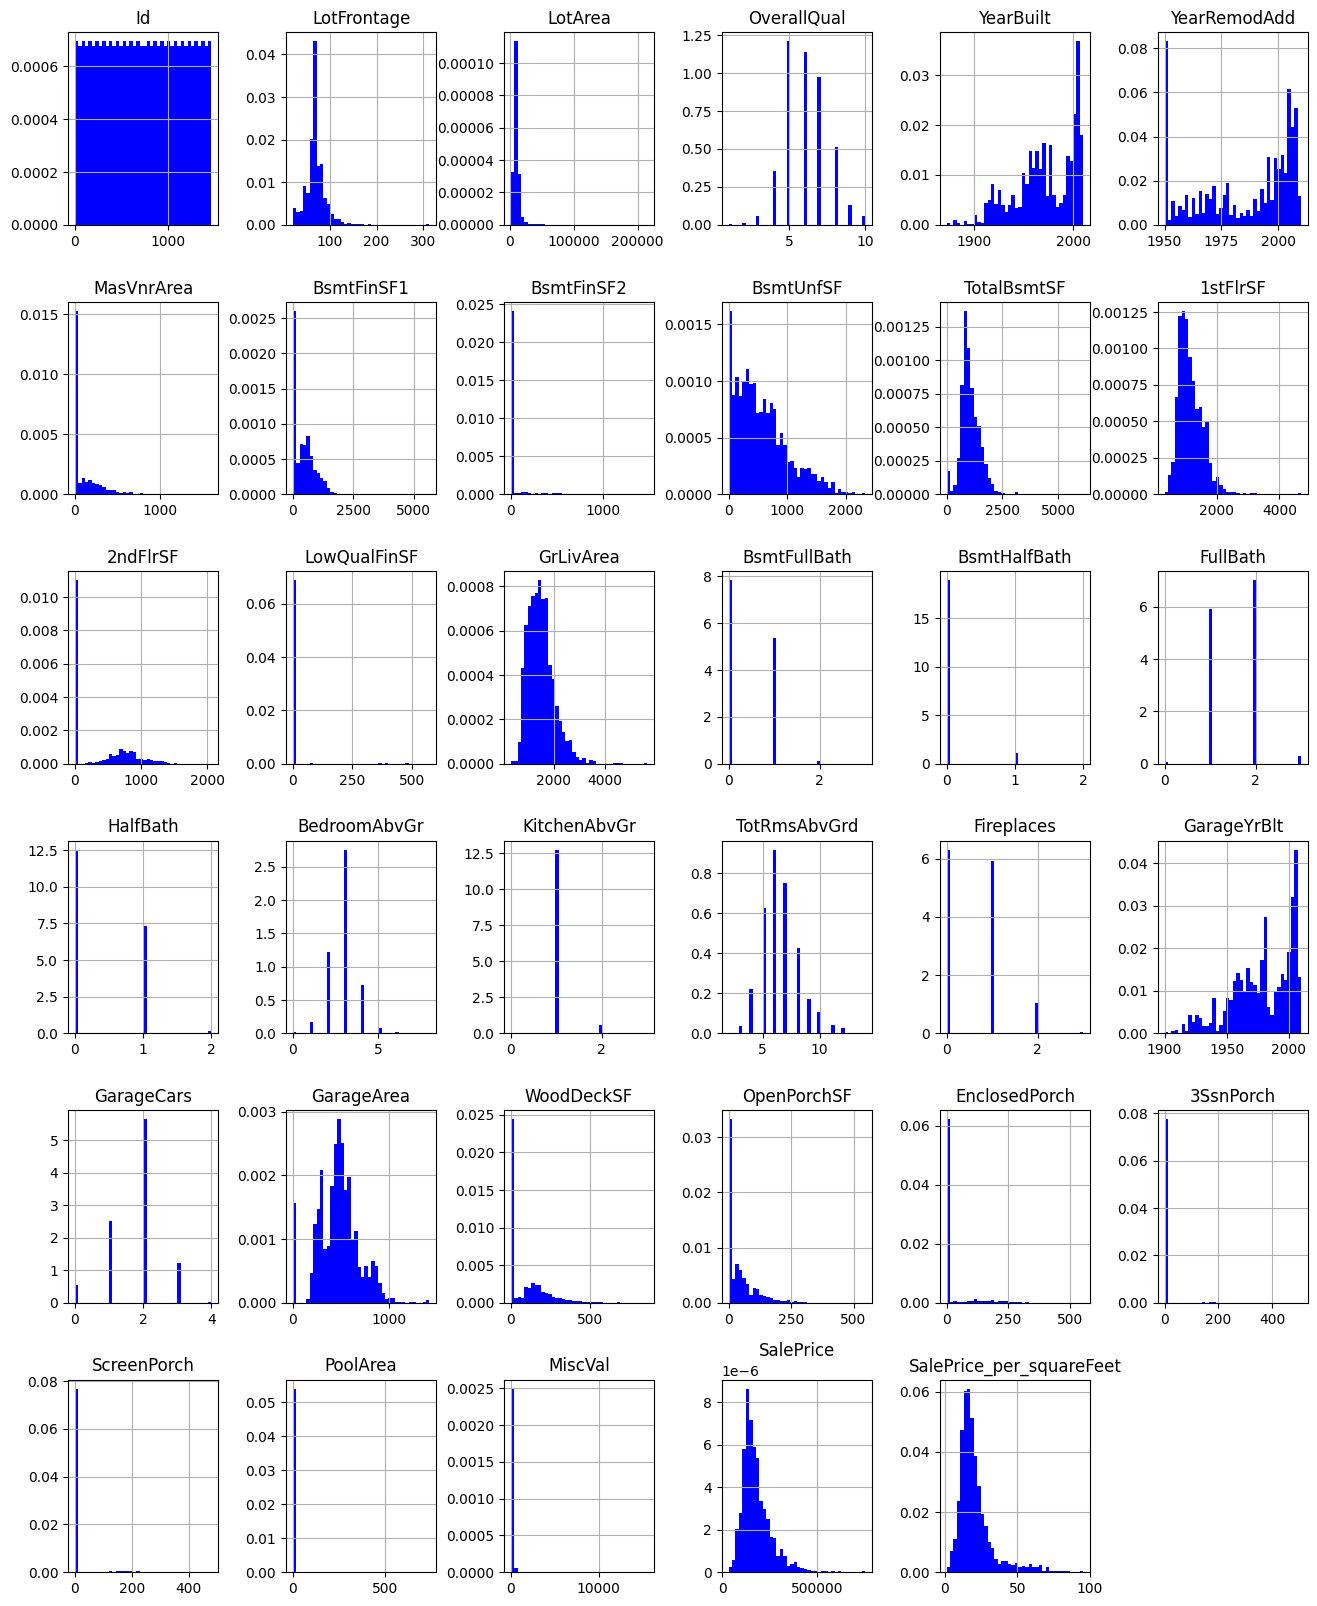

In [19]:
# Displaying subplots for each variable to get a better visualization of the dataset. 

train_df.hist(bins=40, figsize=(16, 20), density=True, color='blue')
plt.subplots_adjust(hspace=0.4, wspace=0.45)#, top=0.97, bottom=0.03, left=0.04, right=0.95)
plt.show()

## Data Preprocessing for Models

In [20]:
# Defining num_attribs variable that stores column names which have numerical attributes. 

num_attribs = train_df.drop(columns=['MSSubClass', 'OverallCond',
                                     'MoSold', 'YrSold',
                                     'SalePrice_per_squareFeet',
                                     'SalePrice']).dtypes[train_df.dtypes != "object"].index


# Defining cat_attribs variable that stores column names which have categorical attributes. 

cat_attribs = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'OverallCond',
               'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
               'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
               'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
               'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
               'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
               'GarageCond', 'PavedDrive', 'YrSold', 'MoSold', 'SaleType', 'SaleCondition']

## Label Encoding for columns with categorical attributes

In [21]:
# Label encoding in train data

for col in cat_attribs:
    lbl_train = LabelEncoder() 
    lbl_train.fit(list(train_df[col].values)) 
    train_df[col] = lbl_train.transform(list(train_df[col].values))

# Label encoding in test data
    
    
for col in cat_attribs:
    lbl_test = LabelEncoder() 
    lbl_test.fit(list(test_df[col].values)) 
    test_df[col] = lbl_test.transform(list(test_df[col].values))

In [23]:
train_df.shape

(1460, 77)

In [24]:
test_df.shape

(1459, 75)

In [25]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_per_squareFeet
0,1,9,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,4,2,8,4,208500,24.674556
1,2,4,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,7,1,8,4,181500,18.906250
2,3,9,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,11,2,8,4,223500,19.866667
3,4,10,3,60.0,9550,1,0,3,0,0,...,0,0,0,0,4,0,8,0,140000,14.659686
4,5,9,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,3,2,8,4,250000,17.531557


In [26]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,5,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,8,4,8,4
1,1462,5,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,8,4,8,4
2,1463,10,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,5,4,8,4
3,1464,10,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,8,4,8,4
4,1465,0,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,0,4,8,4


## Skewed features for numeric variables

The skewness of numerical attributes (num_attribs) in both the training (train_df) and test (test_df) datasets are calculated using the skew function from scipy.stats.

Skewness identifies the asymmetry in the distribution of numerical data.

Highly skewed variables in train and test data sets are defined as variables that have skewness greater than 0.5.

In [34]:
from scipy.stats import skew, boxcox_normmax
skewed_train_df = train_df[num_attribs].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_test_df = test_df[num_attribs].apply(lambda x: skew(x)).sort_values(ascending=False)

In [35]:
high_skewed_train_var = skewed_train_df[skewed_train_df > 0.5]
high_skewed_test_var = skewed_test_df[skewed_test_df > 0.5]

Box-Cox transformation is a log transformation that is used to reduce the skewness in the highly skewed variables identified earlier (skewness > 0.5) .

In [36]:
from scipy.special import boxcox1p
high_skewed_train_idx = high_skewed_train_var.index
high_skewed_test_idx = high_skewed_test_var.index

In [37]:
from scipy.stats import boxcox_normmax, boxcox
import numpy as np

We perform a log transformation on the highly skewed variables in the training and test datasets to mitigate skewness in their distributions.

Loop through High Skewed Columns in Training Data:

The loop iterates over each column index (idx) identified as having high skewness in the training dataset (train_df).

Offset to Ensure Positive Values:

train_series = train_df[idx] + 1 adds 1 to each value in the column. This offset ensures that all values are
positive because logarithm of zero or negative values is undefined.

Check for Valid Transformation:

The if statement performs two checks: np.std(train_series) != 0 ensures that the standard deviation of the column is not zero. If it's zero, all values in the column might be identical, which could cause issues with log transformation.

np.all(train_series > 0) checks that all values in the column are greater than zero. Logarithm of non-positive
values is undefined, so this condition ensures valid transformation.

Log Transformation:

If both conditions are met, train_df[idx] = np.log(train_series) replaces the values in the column with their
natural logarithm. This helps to reduce the skewness in the distribution of the column values.

This process is repeated for the test dataset.

In [38]:
for idx in high_skewed_train_idx:
    train_series = train_df[idx] + 1  # Offset to ensure positive values
    if np.std(train_series) != 0 and np.all(train_series > 0):  # Check for positive values
        train_df[idx] = np.log(train_series)

for idx in high_skewed_test_idx:
    test_series = test_df[idx] + 1  # Similar process for test set
    if np.std(test_series) != 0 and np.all(test_series > 0):  # Check for positive values
        test_df[idx] = np.log(test_series)

In [39]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_per_squareFeet
0,1,9,3,9.646420,9.042040,1,3,3,0,4,...,0.0,0.0,0.0,0.0,4,2,8,4,208500,24.674556
1,2,4,3,10.586093,9.169623,1,3,3,0,2,...,0.0,0.0,0.0,0.0,7,1,8,4,181500,18.906250
2,3,9,3,9.844618,9.328212,1,0,3,0,4,...,0.0,0.0,0.0,0.0,11,2,8,4,223500,19.866667
3,4,10,3,9.302749,9.164401,1,0,3,0,0,...,0.0,0.0,0.0,0.0,4,0,8,0,140000,14.659686
4,5,9,3,10.817370,9.565284,1,0,3,0,2,...,0.0,0.0,0.0,0.0,3,2,8,4,250000,17.531557


Feature Engineering is used to create new features in both the training and test datasets based on existing features.

These new features include:

TotalSF: Total square footage by summing basement, first floor, and second floor square footages.

YrBltAndRemod: Sum of 'YearBuilt' and 'YearRemodAdd' columns.

Total_sqr_footage: Total square footage by summing various square footage columns.

Total_Bathrooms: Total count of bathrooms in different types.

Total_porch_sf: Total porch square footage by summing different porch types.

These operations aim to preprocess the data by addressing skewness in numerical features and creating additional features that might be more informative for machine learning models.

This is done to both, the train and the test datasets.

In [40]:
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df['YrBltAndRemod'] = train_df['YearBuilt']+train_df['YearRemodAdd']
train_df['Total_sqr_footage'] = (train_df['BsmtFinSF1'] + train_df['BsmtFinSF2'] +
                                 train_df['1stFlrSF'] + train_df['2ndFlrSF'])
train_df['Total_Bathrooms'] = (train_df['FullBath'] + (0.5 * train_df['HalfBath']) +
                               train_df['BsmtFullBath'] + (0.5 * train_df['BsmtHalfBath']))
train_df['Total_porch_sf'] = (train_df['OpenPorchSF'] + train_df['3SsnPorch'] +
                              train_df['EnclosedPorch'] + train_df['ScreenPorch'] +
                              train_df['WoodDeckSF'])

In [41]:
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']
test_df['YrBltAndRemod'] = test_df['YearBuilt']+test_df['YearRemodAdd']
test_df['Total_sqr_footage'] = (test_df['BsmtFinSF1'] + test_df['BsmtFinSF2'] +
                                 test_df['1stFlrSF'] + test_df['2ndFlrSF'])
test_df['Total_Bathrooms'] = (test_df['FullBath'] + (0.5 * test_df['HalfBath']) +
                               test_df['BsmtFullBath'] + (0.5 * test_df['BsmtHalfBath']))
test_df['Total_porch_sf'] = (test_df['OpenPorchSF'] + test_df['3SsnPorch'] +
                              test_df['EnclosedPorch'] + test_df['ScreenPorch'] +
                              test_df['WoodDeckSF'])

## Separating training set and test set

In [42]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_per_squareFeet,TotalSF,YrBltAndRemod,Total_sqr_footage,Total_Bathrooms,Total_porch_sf
0,1,9,3,9.646420,9.042040,1,3,3,0,4,...,2,8,4,208500,24.674556,266.350092,4006,132.001632,3.054325,2.568771
1,2,4,3,10.586093,9.169623,1,3,3,0,2,...,1,8,4,181500,18.906250,349.697715,3952,154.267022,2.260142,4.147862
2,3,9,3,9.844618,9.328212,1,0,3,0,4,...,2,8,4,223500,19.866667,281.169385,4003,105.740982,3.054325,2.386805
3,4,10,3,9.302749,9.164401,1,0,3,0,0,...,0,8,0,140000,14.659686,242.826594,3885,66.750413,1.690067,5.294618
4,5,9,3,10.817370,9.565284,1,0,3,0,2,...,2,8,4,250000,17.531557,331.753243,4000,126.685206,3.054325,6.581852


The code below performs several steps for preparing the data for machine learning modeling:

Log Transformation of Target Variable:

train_df['SalePrice'] = np.log1p(train_df['SalePrice']) applies a logarithmic transformation (log(1+x)) to the 'SalePrice' column in the train_df DataFrame. This transformation is often used for target variables in regression tasks to normalize the distribution of the target values.

Defining Features and Target Variable: X = train_df.drop(columns=['Id', 'SalePrice_per_squareFeet', 'SalePrice']) creates the feature matrix X by excluding columns 'Id', 'SalePrice_per_squareFeet', and 'SalePrice' from the train_df DataFrame. y = train_df['SalePrice'] defines the target variable y as the 'SalePrice' column after the log transformation. Train-Validation Split:

train_test_split from sklearn.model_selection is used to split the dataset into training and validation sets. X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.25, random_state=42) performs the split:

X and y are the feature matrix and target variable. test_size=0.25 specifies that 25% of the data will be allocated for validation (X_validation and y_validation), while 75% will be for training (X_train and y_train).

random_state=42 sets the random seed for reproducibility, ensuring that the same split can be obtained each time the code is run.

In [43]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# apply log(1+x) to all 'SalePrice'
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

X = train_df.drop(columns=['Id', 'SalePrice_per_squareFeet', 'SalePrice'])
y = train_df['SalePrice']

X_train, X_validation, y_train, y_validation = train_test_split(X,
                                                                y,
                                                                test_size=0.25,
                                                                random_state=42)

In [44]:
X_train.shape

(1095, 79)

In [45]:
X_validation.shape

(365, 79)

## Training models

The code below is used to evaluate machine learning models using cross-validation to calculate the root mean squared error (RMSE).

The function mean_squared_error from the sklearn.metrics module calculates the mean squared error between the true and predicted values. KFold and cross_val_score are used to create cross-validation folds and evaluate models using cross-validation.

Creating K-Folds for Cross-Validation: kfolds = KFold(n_splits=10, shuffle=True, random_state=42): Initializes a KFold object named kfolds with 10 folds (n_splits=10) for cross-validation. Setting shuffle=True shuffles the data before splitting, and random_state=42 sets a random seed for reproducibility.

Defining Functions: rmsle(y, y_pred): Defines a function rmsle (Root Mean Squared Logarithmic Error) that calculates the RMSE between true y values and predicted y_pred values. It uses the mean_squared_error function from earlier and returns the square root of the mean squared error.

cv_rmse(model, X=X): Defines a function cv_rmse for cross-validated RMSE calculation using cross_val_score. It takes a model and feature matrix X as arguments. It uses cross_val_score to perform cross-validation on the provided model (model) using the feature matrix X and target variable y.

The scoring metric used is "neg_mean_squared_error", which means the negative of mean squared error is calculated. The negative is used as cross_val_score considers higher return values better, hence the negation makes higher values worse.

The results are transformed to RMSE by taking the square root of the negative mean squared errors. These functions are designed to assess the performance of machine learning models using cross-validation and evaluate their RMSE, a common metric for regression tasks. The cv_rmse function, in particular, is intended to be used for evaluating different models by passing them into the function and getting their cross-validated RMSE scores.

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

## Linear Regression

This code below is used for linear regression modeling and evaluation using the scikit-learn library. Let's go through it step by step:

Creating a Linear Regression Model: lin_rg = make_pipeline(RobustScaler(), LinearRegression()): Constructs a linear regression model using scikit-learn's make_pipeline function. This pipeline includes RobustScaler() for robustly scaling the features and LinearRegression() as the regression model itself.

Cross-Validated RMSE Calculation: print('cv_rmse:', cv_rmse(lin_rg).mean()): Uses the cv_rmse function (defined in the code above) to calculate the cross-validated RMSE (Root Mean Squared Error) for the linear regression model (lin_rg). The .mean() calculates the mean RMSE across all cross-validation folds.

Fitting the Model and Making Predictions:

lin_rg.fit(X_train, y_train): Trains the linear regression model (lin_rg) using the training data (X_train features and y_train target).

y_pred_lin_rg = lin_rg.predict(X_validation): Makes predictions (y_pred_lin_rg) on the validation dataset (X_validation). Evaluating Predictions:

print('rmsle:', rmsle(y_validation, y_pred_lin_rg)): Computes the RMSLE (Root Mean Squared Logarithmic Error) between the true target values (y_validation) and the predicted values (y_pred_lin_rg) from the linear regression model. This provides an evaluation metric to assess the performance of the model on the validation set.

The code below sets up a linear regression model, performs cross-validated RMSE calculation to evaluate its performance, fits the model to the training data, generates predictions on the validation set, and computes the RMSLE to assess the model's predictive accuracy. The use of RobustScaler() within the pipeline suggests that feature scaling using a robust scaler is applied before fitting the linear regression model.

In [47]:
from sklearn.linear_model import LinearRegression

lin_rg = make_pipeline(RobustScaler(), LinearRegression())
print('cv_rmse:', cv_rmse(lin_rg).mean())

lin_rg.fit(X_train, y_train)
y_pred_lin_rg = lin_rg.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_lin_rg))

cv_rmse: 1538040587.2671714
rmsle: 0.14244286812885806


## Lasso Regression

Creating a Lasso Regression Model:

lasso_rg = make_pipeline(RobustScaler(), Lasso(alpha=0.001, random_state=42)): Constructs a Lasso regression model using make_pipeline. This pipeline includes RobustScaler() for robust feature scaling and Lasso() as the regression model itself. alpha=0.001: Sets the regularization strength for Lasso regression. random_state=42: Sets the random state for reproducibility. Cross-Validated RMSE Calculation:

print('cv_rmse:', cv_rmse(lasso_rg).mean()): Calculates the cross-validated RMSE (Root Mean Squared Error) for the Lasso regression model (lasso_rg). The .mean() calculates the mean RMSE across all cross-validation folds. Fitting the Model and Making Predictions:

lasso_rg.fit(X_train, y_train): Trains the Lasso regression model (lasso_rg) using the training data (X_train features and y_train target). y_pred_lasso_rg = lasso_rg.predict(X_validation): Generates predictions (y_pred_lasso_rg) on the validation dataset (X_validation). Evaluating Predictions:

print('rmsle:', rmsle(y_validation, y_pred_lasso_rg)): Computes the RMSLE (Root Mean Squared Logarithmic Error) between the true target values (y_validation) and the predicted values (y_pred_lasso_rg) from the Lasso regression model. This evaluates the model's predictive accuracy on the validation set.

The code sets up a Lasso regression model with specific regularization parameters, performs cross-validated RMSE calculation to assess its performance, fits the model to the training data, generates predictions on the validation set, and computes the RMSLE to evaluate how well the Lasso model predicts the target variable compared to the actual values. The use of RobustScaler() within the pipeline suggests that feature scaling using a robust scaler is applied before fitting the Lasso regression model.

In [48]:
from sklearn.linear_model import Lasso

lasso_rg = make_pipeline(RobustScaler(), Lasso(alpha =0.001, random_state=42))
print('cv_rmse:', cv_rmse(lasso_rg).mean())

lasso_rg.fit(X_train, y_train)
y_pred_lasso_rg = lasso_rg.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_lasso_rg))

cv_rmse: 0.1361009796334629
rmsle: 0.13554646939484288


## Ridge Regression

The code uses the Ridge regression model, evaluates its performance, and generates predictions.

ridge_rg = make_pipeline(RobustScaler(), Ridge(alpha=50, solver='cholesky', random_state=42)): Constructs a Ridge regression model using make_pipeline. This pipeline includes RobustScaler() for robust feature scaling and Ridge() as the regression model itself.

alpha=50: Sets the regularization strength for Ridge regression. solver='cholesky': Specifies the solver to use in Ridge regression. 'cholesky' is a solver for computing the least-squares solution.

random_state=42: Sets the random state for reproducibility.

Cross-Validated RMSE Calculation: print('cv_rmse:', cv_rmse(ridge_rg).mean()): Calculates the cross-validated RMSE (Root Mean Squared Error) for the Ridge regression model (ridge_rg). The .mean() calculates the mean RMSE across all cross-validation folds.

Fitting the Model and Making Predictions: ridge_rg.fit(X_train, y_train): Trains the Ridge regression model (ridge_rg) using the training data (X_train features and y_train target). y_pred_ridge_rg = ridge_rg.predict(X_validation): Generates predictions (y_pred_ridge_rg) on the validation dataset (X_validation).

Evaluating Predictions: print('rmsle:', rmsle(y_validation, y_pred_ridge_rg)): Computes the RMSLE (Root Mean Squared Logarithmic Error) between the true target values (y_validation) and the predicted values (y_pred_ridge_rg) from the Ridge regression model. This evaluates the model's predictive accuracy on the validation set.

This code sets up a Ridge regression model with specific regularization parameters, performs cross-validated RMSE calculation to assess its performance, fits the model to the training data, generates predictions on the validation set, and computes the RMSLE to evaluate how well the Ridge model predicts the target variable compared to the actual values.

In [49]:
from sklearn.linear_model import Ridge

ridge_rg = make_pipeline(RobustScaler(), Ridge(alpha=50, solver='cholesky', random_state=42))
print('cv_rmse:', cv_rmse(ridge_rg).mean())

ridge_rg.fit(X_train, y_train)
y_pred_ridge_rg = ridge_rg.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_ridge_rg))

cv_rmse: 0.13692717649602007
rmsle: 0.13558225266556154


## Applying Ridge Regression and Lasso Regression with cross-validation

The lines of code below involve the use of cross-validated regression models with different regularization techniques (Ridge and Lasso) along with their respective cross-validation techniques in scikit-learn.

In [50]:
alphas_alt = [14, 20, 40]
alphas2 = [5e-05, 0.0001, 0.0005, 0.001]
e_alphas = [0.0001, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.5, 0.85, 1]

RidgeCV: This scikit-learn function performs Ridge Regression with built-in cross-validation to find the optimal alpha (regularization strength) from the given alphas (alphas_alt) using k-fold cross-validation (cv=kfolds).

make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds)): Constructs a pipeline including robust scaling of features (RobustScaler()) and Ridge Regression with cross-validation (RidgeCV()).

cv_rmse(ridge_rg_CV).mean(): Calculates the cross-validated RMSE for the Ridge regression model.

In [51]:
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV

ridge_rg_CV = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
print('cv_rmse:', cv_rmse(ridge_rg_CV).mean())

ridge_rg_CV.fit(X_train, y_train)
y_pred_ridge_rg_CV = ridge_rg_CV.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_ridge_rg_CV))

cv_rmse: 0.13706056267387373
rmsle: 0.135939199132233


LassoCV: This function performs Lasso Regression with cross-validation to find the optimal alpha (alphas2) using k-fold cross-validation (cv=kfolds).

make_pipeline(RobustScaler(), LassoCV(...)): Constructs a pipeline including robust scaling of features (RobustScaler()) and Lasso Regression with cross-validation (LassoCV()).

cv_rmse(lasso_rg_CV).mean(): Calculates the cross-validated RMSE for the Lasso regression model.

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

# Assume alphas2, kfolds, X_train, y_train, X_validation, y_validation are defined elsewhere
lasso_rg_CV = make_pipeline(RobustScaler(), LassoCV(max_iter=int(1e7), alphas=alphas2, cv=kfolds, random_state=42))

def cv_rmse(model, X=X_train, y=y_train, kfolds=kfolds):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return rmse

print('cv_rmse:', cv_rmse(lasso_rg_CV).mean())

lasso_rg_CV.fit(X_train, y_train)
y_pred_lasso_rg_CV = lasso_rg_CV.predict(X_validation)

# Assume rmsle function is defined elsewhere
print('rmsle:', rmsle(y_validation, y_pred_lasso_rg_CV))

cv_rmse: 0.1398977228184977
rmsle: 0.13554646939484288


## SVR

These lines of code involve Support Vector Regression (SVR), a regression technique using Support Vector Machines (SVM) to perform regression tasks.

SVR(): This is the SVR model class from scikit-learn. The parameters passed here are:

C=5: Regularization parameter, controlling the trade-off between smooth decision boundary and fitting to the training data. epsilon=0.05: Specifies the margin of tolerance where no penalty is given to errors (similar to the epsilon in the epsilon-insensitive loss function). gamma=0.00001: Kernel coefficient for 'rbf' kernel. It defines how much influence a single training example has. Low values imply far-reaching effects. .fit(X_train, y_train): Fits the SVR model to the training data (X_train are the features, y_train is the target).

.predict(X_validation): Uses the trained SVR model to predict the target values (y_pred_svr) for the validation dataset (X_validation).

rmsle(y_validation, y_pred_svr): Calls the rmsle function (assumed to be defined elsewhere) to calculate the RMSLE (Root Mean Squared Logarithmic Error) between the true target values (y_validation) and the predicted values (y_pred_svr) generated by the SVR model. RMSLE is a measure used to evaluate the performance of regression models.

In [53]:
from sklearn.svm import SVR

svr_mdl = SVR(C=5, epsilon=0.05, gamma=0.00001)
svr_mdl.fit(X_train, y_train)

SVR(C=5, epsilon=0.05, gamma=1e-05)

In [56]:
y_pred_svr = svr_mdl.predict(X_validation)
rmsle(y_validation, y_pred_svr)

0.16765494721395865

## LINEAR SVR

Linear Support Vector Regression (LinearSVR) model is a linear version of Support Vector Regression (SVR) that is used for regression tasks.

LinearSVR(): This is the LinearSVR model class from scikit-learn.

The parameters passed are: epsilon=0.01: Specifies the margin of tolerance where no penalty is given to errors (similar to the epsilon in the epsilon-insensitive loss function).

dual=True: Enables the use of the dual formulation. When the number of samples is greater than the number of features, it's often faster to set dual=True.

max_iter=1000000: Maximum number of iterations taken for optimization.

random_state=42: Sets the random seed for reproducibility.

.fit(X_train, y_train): Fits the LinearSVR model to the training data (X_train are the features, y_train is the target).

.predict(X_validation): Uses the trained LinearSVR model to predict the target values (y_pred_linSVR) for the validation dataset (X_validation).

rmsle(y_validation, y_pred_linSVR): Calls the rmsle function (assumed to be defined elsewhere) to calculate the RMSLE (Root Mean Squared Logarithmic Error) between the true target values (y_validation) and the predicted values (y_pred_linSVR) generated by the LinearSVR model. RMSLE is a measure used to evaluate the performance of regression models.

LinearSVR differs from traditional SVR by using a linear kernel and, in this case, by setting the dual optimization parameter to True, which can be beneficial when the number of samples is larger than the number of features. The code fits the LinearSVR model to the training data, predicts the target values for the validation set, and assesses the model's performance using the RMSLE metric.

In [60]:
from sklearn.svm import LinearSVR

# Using dual=True
lsvr = LinearSVR(epsilon=0.01, dual=True, max_iter=1000000, random_state=42)
lsvr.fit(X_train, y_train)

C:\Users\Satyam Pandey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(dual=True, epsilon=0.01, max_iter=1000000, random_state=42)

In [61]:
y_pred_linSVR = lsvr.predict(X_validation)
rmsle(y_validation, y_pred_linSVR)

0.21291334880290844

## Gradient Boosting Regressor

GradientBoostingRegressor from scikit-learn is a popular ensemble learning technique based on boosting, specifically designed for regression tasks.

GradientBoostingRegressor(): This initializes the Gradient Boosting Regressor.

The parameters passed are: n_estimators=2000: Number of boosting stages (trees) to be used in the ensemble. Higher values may lead to overfitting. learning_rate=0.05: Shrinks the contribution of each tree. Lower values require more trees but can generalize better. max_depth=4: Maximum depth of individual trees. max_features='sqrt': The number of features to consider for splitting at each tree node. 'sqrt' means considering the square root of total features. min_samples_leaf=15: Minimum number of samples required to be at a leaf node. min_samples_split=10: Minimum number of samples required to split an internal node. loss='huber': The loss function to be optimized. 'huber' is a robust loss function for regression. random_state=42: Sets the random seed for reproducibility.

cv_rmse(gbr).mean(): Calculates the cross-validated RMSE (Root Mean Squared Error) for the Gradient Boosting Regressor (gbr). The .mean() computes the mean of the cross-validated RMSE scores.

.fit(X_train, y_train): Fits the Gradient Boosting Regressor (gbr) to the training data (X_train are the features, y_train is the target).

.predict(X_validation): Uses the trained Gradient Boosting Regressor (gbr) to predict the target values (y_pred_gbr) for the validation dataset (X_validation).

rmsle(y_validation, y_pred_gbr): Calls the rmsle function (assumed to be defined elsewhere) to calculate the RMSLE (Root Mean Squared Logarithmic Error) between the true target values (y_validation) and the predicted values (y_pred_gbr) generated by the Gradient Boosting Regressor. RMSLE is a measure used to evaluate the performance of regression models.

The code initializes a Gradient Boosting Regressor with specific hyperparameters, performs cross-validated RMSE calculation to assess its performance, fits the model to the training data, generates predictions on the validation set, and computes the RMSLE to evaluate the model's predictive accuracy compared to the actual target values.

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.05, max_depth=4,
                                max_features='sqrt', min_samples_leaf=15, min_samples_split=10,
                                loss='huber', random_state =42)
print('cv_rmse:', cv_rmse(gbr).mean())

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_gbr))

cv_rmse: 0.12556790200839738
rmsle: 0.12428224131033187


## Prediction with test data

The trained Gradient Boosting Regressor (gbr) is used to predict sale prices for a test dataset. The predictions are transformed back to the original scale as there was a logarithmic transformation applied earlier. An output DataFrame (output_df) is created with 'Id' and predicted 'SalePrice' columns.

In [63]:
y_test = gbr.predict(test_df.drop(columns='Id'))

In [64]:
y_test = np.expm1(y_test)

In [65]:
test_id = test_df['Id']
output_df = pd.DataFrame({'Id':test_id,
                          'SalePrice': y_test},
                         columns=['Id', 'SalePrice'])

In [66]:
output_df.head()

,Id,SalePrice
0,1461,133021.192141
1,1462,163342.180869
2,1463,184202.283455
3,1464,187728.091823
4,1465,201313.303159


## Advanced Models

## XGBoost

The lines of code below involve utilizing the XGBRegressor from the XGBoost library, which is an implementation of Gradient Boosting designed for speed and performance.

XGBRegressor(): Initializes the XGBoost Regressor. The parameters passed are: n_estimators=1000: Number of boosting rounds (trees) to be used in the ensemble. learning_rate=0.05: Shrinkage factor to prevent overfitting by penalizing the weights of new trees. gamma=0: Minimum loss reduction required to make a further partition on a leaf node of the tree. subsample=0.75: Fraction of samples used for fitting the individual base learners. colsample_bytree=1: Fraction of features used for fitting the individual base learners (columns). max_depth=7: Maximum depth of a tree. random_state=42: Sets the random seed for reproducibility.

.fit(X_train, y_train): Trains the XGBoost Regressor (xgb) using the training data (X_train features, y_train target).

.predict(X_validation): Uses the trained XGBoost Regressor (xgb) to predict the target values (y_pred_xgb) for the validation dataset (X_validation). rmsle(y_validation, y_pred_xgb): Calls the rmsle function (assumed to be defined elsewhere) to calculate the RMSLE (Root Mean Squared Logarithmic Error) between the true target values (y_validation) and the predicted values (y_pred_xgb) generated by the XGBoost Regressor. RMSLE is a measure used to evaluate the performance of regression models.

The code initializes an XGBoost Regressor with specific hyperparameters, fits the model to the training data, generates predictions on the validation set, and computes the RMSLE to evaluate the model's predictive accuracy compared to the actual target values. XGBoost is known for its high performance and efficiency in handling various types of datasets.

In [73]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.05, gamma=0, subsample=0.75,
                   colsample_bytree=1, max_depth=7, random_state=42)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_xgb))

rmsle: 0.13387638273996694


## LightGBM

These lines of code involve using the LGBMRegressor from the LightGBM library, which is a gradient boosting framework that uses tree-based learning algorithms.

In [79]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(objective='regression', num_leaves=5,
                     learning_rate=0.05, n_estimators=720,
                     max_bin=55, bagging_fraction=0.8,
                     bagging_freq=5, feature_fraction=0.2319,
                     feature_fraction_seed=9, bagging_seed=9,
                     min_data_in_leaf=6, min_sum_hessian_in_leaf=11)

lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_lgbm))

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

## CatBoost

These lines of code involve using the CatBoostRegressor from the CatBoost library, which is a gradient boosting library specifically designed to handle categorical features efficiently.

CatBoostRegressor(): Initializes the CatBoost Regressor. The parameters passed are: iterations=2000: Number of boosting rounds (trees) to be used in the ensemble. learning_rate=0.03: Shrinkage factor to prevent overfitting by penalizing the weights of new trees. depth=4: Maximum depth of the trees. l2_leaf_reg=20: L2 regularization term for leaf weights. bootstrap_type='Bernoulli': Sampling type used for model fitting. 'Bernoulli' means sampling according to Bernoulli distribution. subsample=0.6: Fraction of samples used for fitting the individual base learners. eval_metric='RMSE': Evaluation metric used during training, in this case, Root Mean Squared Error. metric_period=50: Period to calculate the evaluation metric (RMSE in this case). od_wait=20: Number of iterations to wait for the model to improve before stopping (used with od_type='Iter'). od_type='Iter': Stopping criteria based on the number of iterations without improvement. random_state=42: Sets the random seed for reproducibility.

.fit(X_train, y_train, verbose=False): Trains the CatBoost Regressor (cat) using the training data (X_train features, y_train target) with verbose mode turned off to suppress the progress messages.

.predict(X_validation): Uses the trained CatBoost Regressor (cat) to predict the target values (y_pred_cat) for the validation dataset (X_validation). rmsle(y_validation, y_pred_cat): Calls the rmsle function (assumed to be defined elsewhere) to calculate the RMSLE (Root Mean Squared Logarithmic Error) between the true target values (y_validation) and the predicted values (y_pred_cat) generated by the CatBoost Regressor. RMSLE is a measure used to evaluate the performance of regression models. In summary, this code initializes a CatBoost Regressor with specific hyperparameters, fits the model to the training data, generates predictions on the validation set, and computes the RMSLE to evaluate the model's predictive accuracy compared to the actual target values. CatBoost is known for its handling of categorical features and efficient boosting techniques.

In [80]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(iterations=2000, learning_rate=0.03, depth=4, l2_leaf_reg=20,
                        bootstrap_type='Bernoulli', subsample=0.6, eval_metric='RMSE',
                        metric_period=50, od_wait=20, od_type='Iter', random_state=42)

cat.fit(X_train, y_train, verbose=False)
y_pred_cat = cat.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_cat))

rmsle: 0.12083141878239452


## Random Forest

The RandomForestRegressor from scikit-learn is an ensemble learning method based on constructing multiple decision trees during training and outputting the mean prediction of the individual trees for regression tasks.

RandomForestRegressor(): Initializes the Random Forest Regressor.

The parameters passed are: n_estimators=500: Number of trees in the random forest. max_depth=15: Maximum depth of the trees in the forest. random_state=42: Sets the random seed for reproducibility.

.fit(X_train, y_train): Trains the Random Forest Regressor (rf) using the training data (X_train features, y_train target).

.predict(X_validation): Uses the trained Random Forest Regressor (rf) to predict the target values (y_pred_rf) for the validation dataset (X_validation). rmsle(y_validation, y_pred_rf): Calls the rmsle function (assumed to be defined elsewhere) to calculate the RMSLE (Root Mean Squared Logarithmic Error) between the true target values (y_validation) and the predicted values (y_pred_rf) generated by the Random Forest Regressor. RMSLE is a measure used to evaluate the performance of regression models.

The code initializes a Random Forest Regressor with specific hyperparameters, fits the model to the training data, generates predictions on the validation set, and computes the RMSLE to evaluate the model's predictive accuracy compared to the actual target values. RandomForestRegressor is known for its robustness and effectiveness in handling various types of data while mitigating overfitting.

In [81]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=500, max_depth=15, random_state=42)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_rf))

rmsle: 0.13661583637639482


## ElasticNet

The ElasticNet is a regression model from scikit-learn, which combines the penalties of Lasso (L1) and Ridge (L2) regression, offering a balance between them.

ElasticNet(): Initializes the ElasticNet regression model.

The parameters passed are: alpha=0.001: Regularization parameter controlling the total strength of the penalties. Higher values specify stronger regularization. l1_ratio=0.5: The mixing parameter (0 to 1) indicating the balance between L1 (Lasso) and L2 (Ridge) penalties. A value of 0 corresponds to Ridge, 1 to Lasso, and values in between to a combination of both. random_state=42: Sets the random seed for reproducibility.

.fit(X_train, y_train): Trains the ElasticNet model (elastic_net) using the training data (X_train features, y_train target).

.predict(X_validation): Uses the trained ElasticNet model (elastic_net) to predict the target values (y_pred_elastic) for the validation dataset (X_validation).

rmsle(y_validation, y_pred_elastic): Calls the rmsle function (assumed to be defined elsewhere) to calculate the RMSLE (Root Mean Squared Logarithmic Error) between the true target values (y_validation) and the predicted values (y_pred_elastic) generated by the ElasticNet model. RMSLE is a measure used to evaluate the performance of regression models.

In [82]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_validation)
print('rmsle:', rmsle(y_validation, y_pred_elastic))

rmsle: 0.139046911973655


C:\Users\Satyam Pandey\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.525e+00, tolerance: 1.694e-02
  model = cd_fast.enet_coordinate_descent(


## Feature Importance Plot

This code demonstrates how to visualize the feature importances of a RandomForestRegressor model using Python's matplotlib and seaborn libraries.

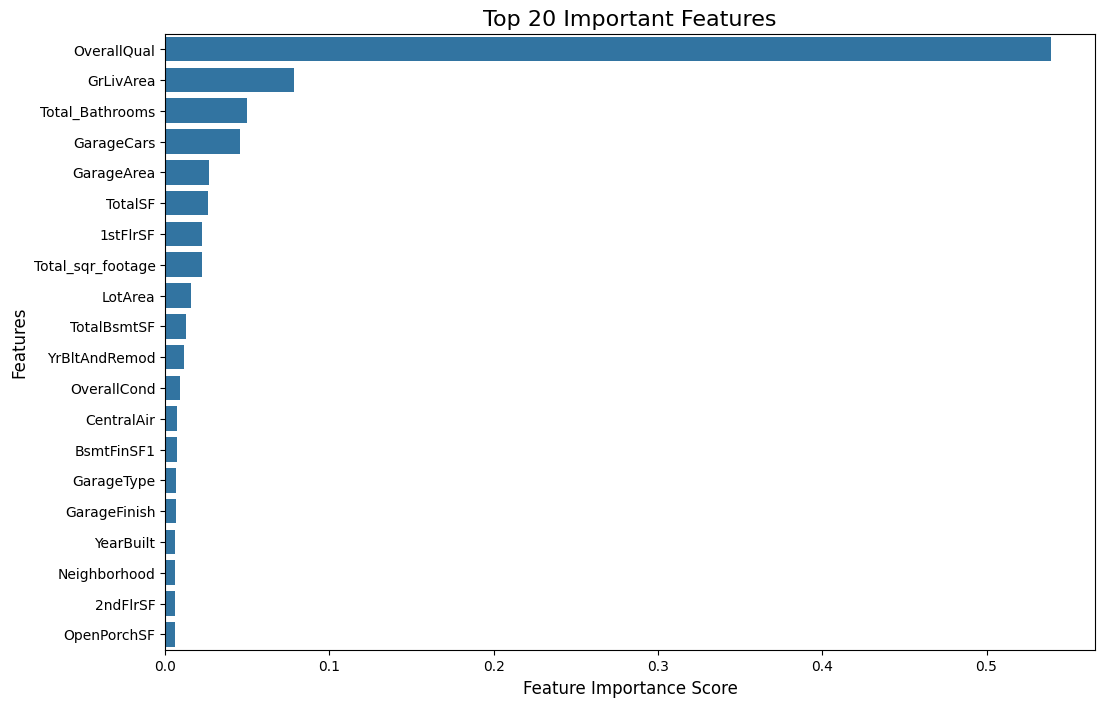

In [85]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Training a RandomForestRegressor on your dataset
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # X_train and y_train need to be your training data

# Access the feature_importances_ attribute
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Now, let's create a cleaner feature importance plot
# Increase the figure size for better readability
plt.figure(figsize=(12, 8))

# Select top N features for a cleaner plot (let's say top 20)
top_features = feature_importances.sort_values(ascending=False)[:20]

# Create a bar plot with the feature importances
sns.barplot(x=top_features, y=top_features.index)

# Set labels and title for the plot
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 20 Important Features', fontsize=16)

# Show the plot
plt.show()

## Residuals Plot

This code is used to create a residual plot, which is a plot of the residuals against the predicted values from a regression model. Residuals represent the differences between the observed and predicted target values.

y_pred = rf_model.predict(X_validation): Uses the trained RandomForestRegressor model (rf_model) to predict target values (y_pred) for the validation dataset (X_validation).

residuals = y_validation - y_pred : Calculates the residuals by subtracting the predicted values (y_pred) from the actual target values (y_validation). Residuals represent the differences between the observed and predicted values.

sns.scatterplot(x=y_pred, y=residuals): Uses Seaborn's scatterplot function to create a scatter plot.The x-axis (x=y_pred) represents the predicted values. The y-axis (y=residuals) represents the residuals.

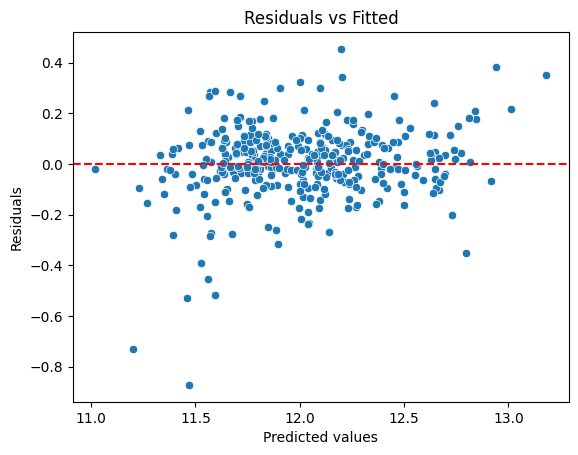

In [87]:
# Make sure rf_model has been fitted as shown in your previous code snippet
y_pred = rf_model.predict(X_validation)  # Get predictions from the model

# Calculate residuals
residuals = y_validation - y_pred

# Now, let's plot the residuals
import seaborn as sns
import matplotlib.pyplot as plt

# Note that seaborn does not have a function `residualplot`.
# Instead, you can use `scatterplot` to create a residuals plot.
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at zero for reference
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

## Prediction vs Actual Plot

The scatter plot illustrates the relationship between actual and predicted house prices. It helps visualize how well the model's predictions align with the true prices. The diagonal line represents perfect predictions where actual and predicted prices perfectly match. Points scattered around this line indicate discrepancies between actual and predicted prices by the model.

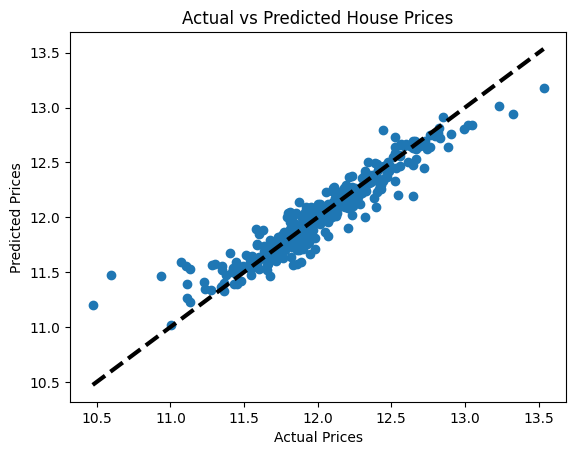

In [88]:
plt.scatter(y_validation, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], 'k--', lw=3)
plt.show()

## Distribution of Target Variable

The code utilizes Seaborn's histplot function to create a histogram of the distribution of sale prices ('SalePrice') in the dataset.

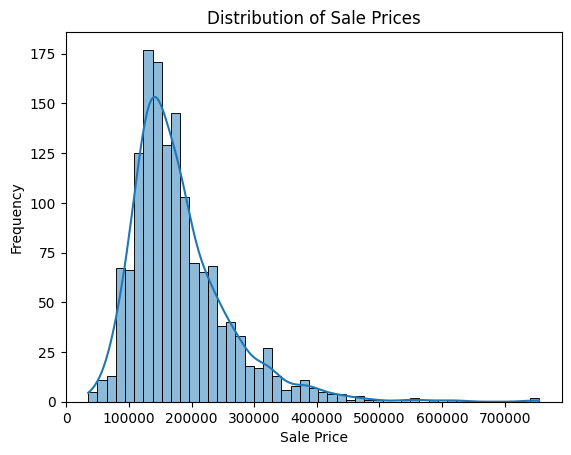

In [89]:
sns.histplot(train_df['SalePrice'], kde=True)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Prices')
plt.show()

## Correlation Heatmap

This code generates a heatmap visualization of the correlation matrix using Seaborn's heatmap function and Matplotlib for display.

corr_matrix = train_df.corr(): Computes the correlation matrix using the .corr() method on the train_df DataFrame. The correlation matrix shows pairwise correlations between different features (columns) in the dataset.

plt.figure(figsize=(12, 10)) : Sets up the Matplotlib figure with a specific size using plt.figure(figsize=(12, 10)). This increases the size of the figure for better readability of the heatmap.

sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=.5): Uses Seaborn's heatmap function to create a heatmap. corr_matrix is the correlation matrix calculated earlier. cmap='coolwarm' sets the color map to 'coolwarm', which uses a combination of cool (blue) and warm (red) colors to represent negative and positive correlations, respectively.linewidths=.5 specifies the width of the lines separating each cell in the heatmap.

The output will be a heatmap visualizing the correlation matrix of features in the dataset.

In this plot: Positive correlations are represented in warmer colors (closer to red). Negative correlations are represented in cooler colors (closer to blue). A value closer to 1 indicates a strong positive correlation, while a value closer to -1 indicates a strong negative correlation. Values near 0 imply weak or no correlation between the features. This visualization helps in identifying relationships and dependencies between different features in the dataset.

C:\Users\Satyam Pandey\AppData\Local\Temp\ipykernel_25572\309990078.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


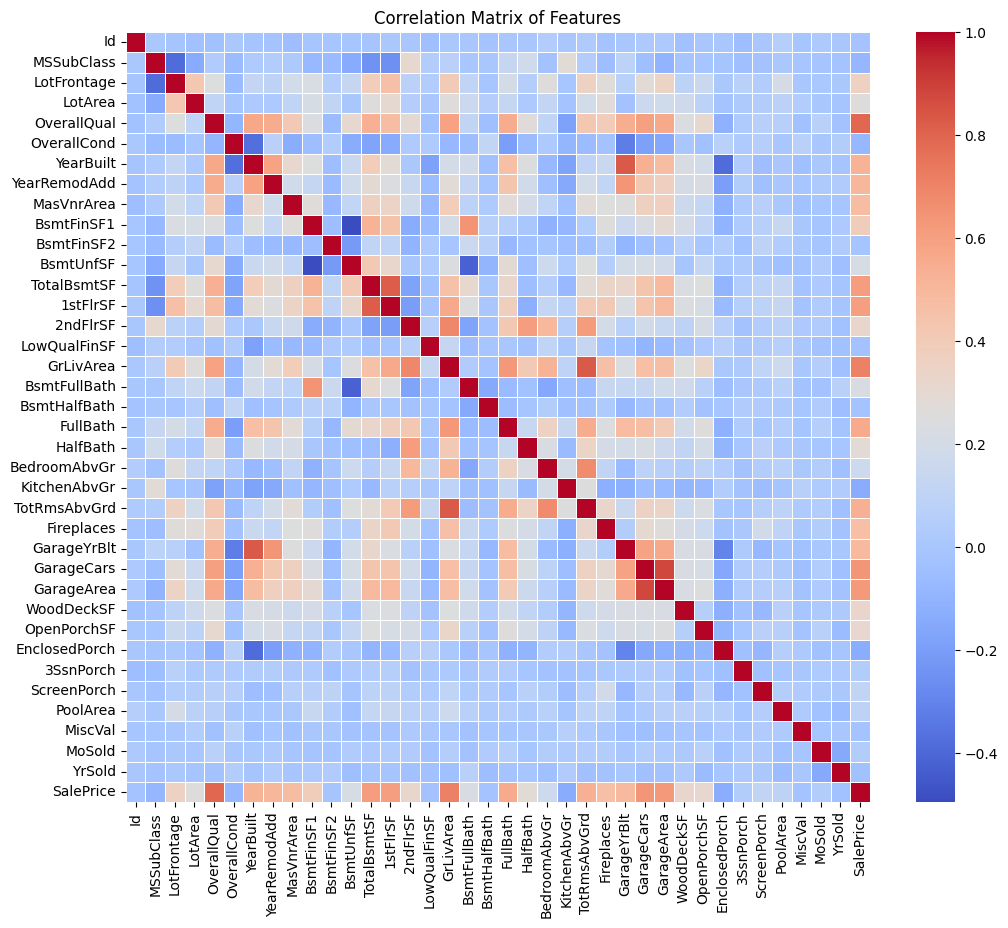

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = train_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))  # Increase figure size

# Draw the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

## Learning Curve

This code generates a learning curve to visualize the performance of a machine learning model (RandomForestRegressor) concerning the amount of training data.

model = RandomForestRegressor(n_estimators=100, random_state=42): Defines the model as a RandomForestRegressor with 100 trees (n_estimators=100) and a specific random seed (random_state=42).

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1): learning_curve is used to generate learning curves. estimator=model specifies the model. X_train and y_train are the training data and target. train_sizes=np.linspace(0.1, 1.0, 10) specifies the sizes of the training set used to generate the curve. cv=10 indicates 10-fold cross-validation. n_jobs=-1 uses all available CPU cores for computation.

Means and Standard deviations of training and validation scores across different training set sizes are calculated.

The output of the code below will be a learning curve plot showing how the model's performance (accuracy in this case) changes concerning the amount of training data. It helps in understanding whether the model would benefit from more training data or if it's suffering from overfitting/underfitting based on the training and validation scores.

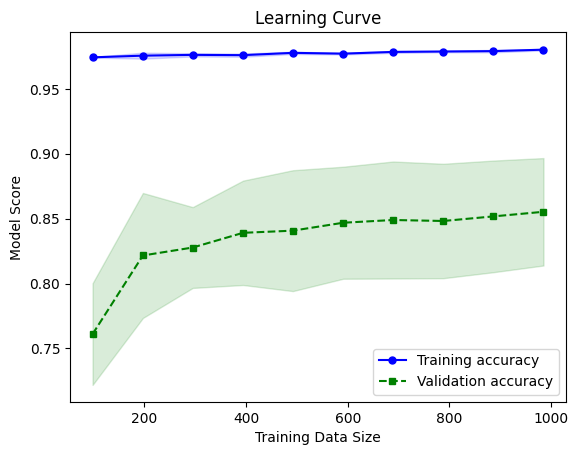

In [93]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=X_train, y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Training Data Size')
plt.ylabel('Model Score')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.show()

## Box Plot for Feature Distribution

This code uses Seaborn's boxplot function to create boxplots for the features within the train_df DataFrame.

sns.boxplot(data=train_df): Uses sns.boxplot to create boxplots for all the features in the train_df DataFrame. This creates a separate boxplot for each numerical feature, showing their distributions, quartiles, and potential outliers.

plt.xticks(rotation=90) : Rotates the x-axis labels by 90 degrees for better readability. This is often necessary when the feature names or categories are too long to fit horizontally.

The output will be a set of vertical boxplots, one for each numerical feature in the train_df DataFrame. Each boxplot represents the distribution of values within a specific feature, displaying quartiles (25th, median, and 75th percentile) along with potential outliers. These boxplots are useful for visualizing the spread, central tendency, and skewness of numerical feature distributions in the dataset.

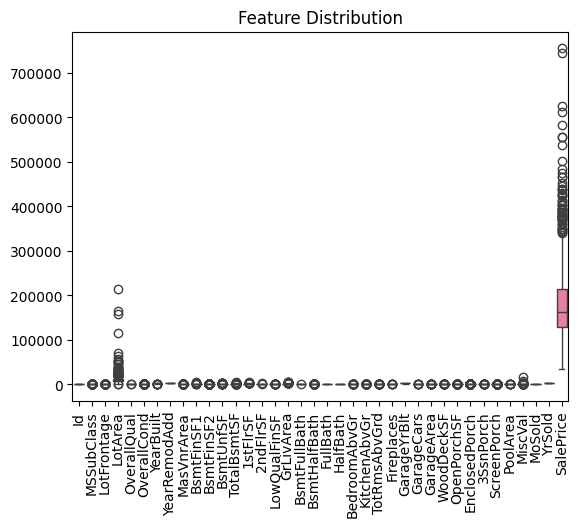

In [94]:
sns.boxplot(data=train_df)
plt.xticks(rotation=90)
plt.title('Feature Distribution')
plt.show()

## Pair Plot

This code utilizes Seaborn's pairplot function to create a grid of pairwise scatterplots between selected features from the train_df DataFrame.

The output will be a grid of scatterplots showing pairwise relationships between the specified features ('SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars'). Each scatterplot in the grid displays the relationship between two features, helping visualize potential correlations or patterns among them. This visualization is useful for understanding how these features interact or relate to each other and to the target variable ('SalePrice' in this case).

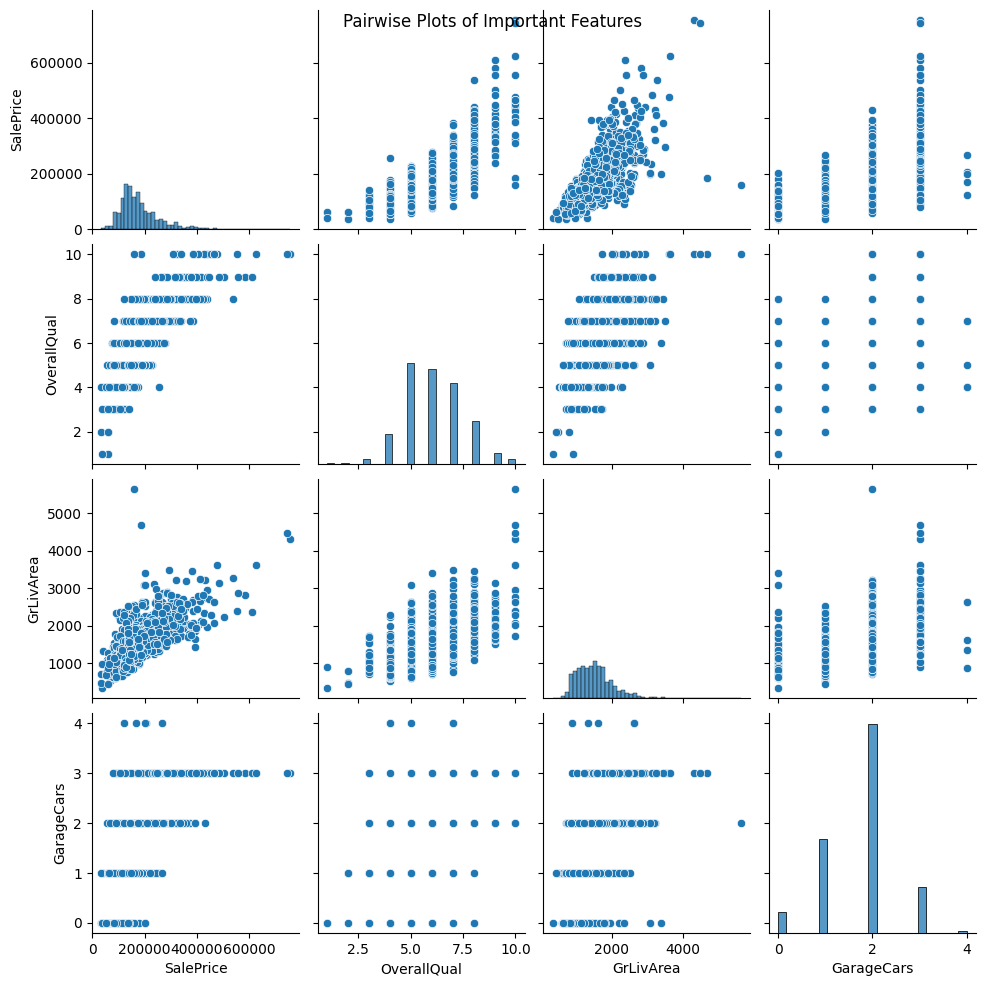

In [95]:
sns.pairplot(train_df, vars=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars'])  # Choose relevant features
plt.suptitle('Pairwise Plots of Important Features')
plt.show()

## QQ Plot (Quantile-Quantile Plot)

This code generates a Q-Q (quantile-quantile) plot using scipy.stats.probplot to compare the distribution of residuals against a theoretical normal distribution.

The output is a Q-Q plot displaying how the residuals compare against a theoretical normal distribution. If the residuals follow a perfect normal distribution, the points on the plot will align closely along the diagonal line. Deviations from the diagonal line indicate departures from normality. This plot helps in assessing whether the residuals follow a normal distribution, which is a fundamental assumption in many statistical models.

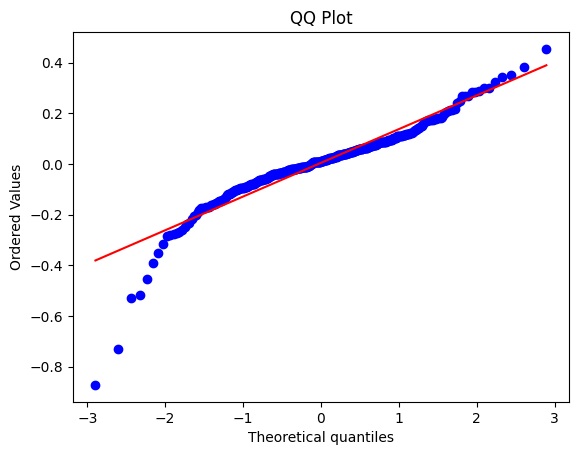

In [96]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

## Violin Plot

This code generates a violin plot using Seaborn's violinplot function to visualize the distribution of sale prices (SalePrice) across different levels of overall quality (OverallQual) in the train_df DataFrame.

The output is a violin plot displaying the distribution of sale prices across different levels of overall quality. Each violin plot represents the distribution of sale prices within a specific level of overall quality. The width of the violin indicates the density of data points at different price ranges, while the shape shows the probability density of sale prices at various values. This visualization helps in understanding how sale prices vary concerning different levels of overall quality and provides insights into their distributions.

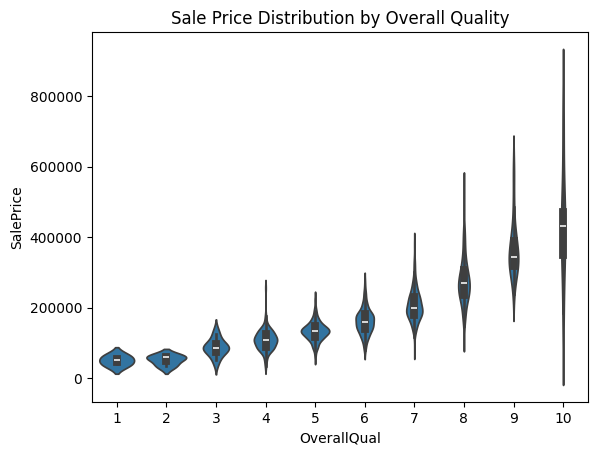

In [97]:
sns.violinplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Sale Price Distribution by Overall Quality')
plt.show()

## Cumulative Distribution Plot

The code generates an empirical cumulative distribution function (ECDF) plot using Seaborn's ecdfplot function to visualize the cumulative distribution of sale prices (SalePrice) in the train_df DataFrame.

The output is an ECDF plot illustrating the cumulative distribution of sale prices. The ECDF represents the proportion of data points that are less than or equal to a certain value on the x-axis (Sale Price in this case). It shows how the sale prices are spread across the dataset and provides insights into the cumulative probability distribution of the prices.

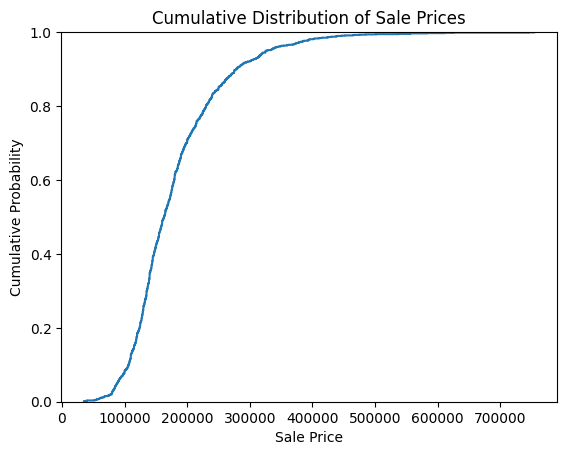

In [98]:
sns.ecdfplot(train_df['SalePrice'])
plt.xlabel('Sale Price')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution of Sale Prices')
plt.show()

## Saving Model

In [101]:
# This line of code saves the DataFrame output_df to a CSV file named 'Houseprice_Prediction.csv' without including the DataFrame's index in the saved file
# The output_df contains the ID and predicted sale price of the houses from the test data set. 

output_df.to_csv('Houseprice_Prediction.csv', index=False)